In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow import keras

In [2]:
df = pd.read_csv('Abandono_clientes.csv')

print(df.shape)
df.head()

(10000, 14)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.drop(df.columns[[0, 1, 2]], axis = 1, inplace=True)

df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
df.isna().any()

CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

0    7963
1    2037
Name: Exited, dtype: int64


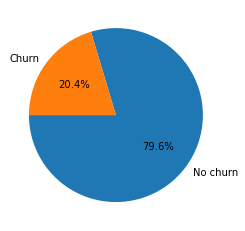

In [6]:
churn_rate = df['Exited'].value_counts()

print(churn_rate)

plt.pie(churn_rate, 
        labels=['No churn','Churn'], 
        startangle=180, 
        autopct='%1.1f%%')

plt.show()

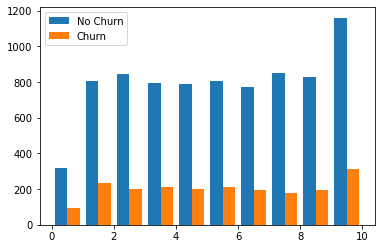

In [7]:
plt.hist([df[df.Exited == 0].Tenure, df[df.Exited == 1].Tenure], label=['No Churn', 'Churn'])
plt.legend()
plt.show()

Fazer mais algumas vizualizações

In [8]:
df['Gender'].replace({'Female':1, 'Male':0}, inplace = True)

In [9]:
df['Gender'].unique()

array([1, 0], dtype=int64)

In [10]:
df = pd.get_dummies(data=df, columns=['Geography'])
df.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [11]:
df.dtypes

CreditScore            int64
Gender                 int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_France       uint8
Geography_Germany      uint8
Geography_Spain        uint8
dtype: object

In [12]:
to_scale = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

scaler = MinMaxScaler()

df[to_scale] = scaler.fit_transform(df[to_scale])

In [13]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,0.538,1,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,1,0,0
1,0.516,1,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0,0,1
2,0.304,1,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,1,0,0
3,0.698,1,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,1,0,0
4,1.000,1,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0,0,1


In [14]:
x = df.drop('Exited', axis='columns')
y = df['Exited']

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)
x_train.shape

(8000, 12)

In [36]:
model = keras.Sequential([
    #Same number of neurons as columns
    keras.layers.Dense(12, input_shape=(12,), activation='relu'),
    keras.layers.Dense(12, activation='relu'),
    keras.layers.Dense(7, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'), 
])

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=100)

Epoch 1/100
250/250 [==============================] - 0s 990us/step - loss: 0.4961 - accuracy: 0.7960
Epoch 2/100
250/250 [==============================] - 0s 995us/step - loss: 0.4697 - accuracy: 0.7960
Epoch 3/100
250/250 [==============================] - 0s 939us/step - loss: 0.4577 - accuracy: 0.7981
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4460 - accuracy: 0.8056
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4357 - accuracy: 0.8111
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4289 - accuracy: 0.8133
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4237 - accuracy: 0.8170
Epoch 8/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4167 - accuracy: 0.8213
Epoch 9/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4065 - accuracy: 0.8259: 0s - loss: 0.4030 - accuracy: 
Epoch 10/100
250/250 [==============================]

250/250 [==============================] - 0s 1ms/step - loss: 0.3278 - accuracy: 0.8631
Epoch 81/100
250/250 [==============================] - 0s 963us/step - loss: 0.3271 - accuracy: 0.8650
Epoch 82/100
250/250 [==============================] - 0s 991us/step - loss: 0.3280 - accuracy: 0.8669
Epoch 83/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3268 - accuracy: 0.8649
Epoch 84/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3272 - accuracy: 0.8641
Epoch 85/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3256 - accuracy: 0.8661
Epoch 86/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3274 - accuracy: 0.8649
Epoch 87/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3260 - accuracy: 0.8652
Epoch 88/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3273 - accuracy: 0.8648
Epoch 89/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3263 - accura

In [35]:
model.evaluate(x_test, y_test)

63/63 [==============================] - 0s 857us/step - loss: 0.3606 - accuracy: 0.8565


[0.3606065809726715, 0.8565000295639038]

In [46]:
pred_test = model.predict(x_test)

y_pred = []
for e in pred_test:
    if e > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [42]:
y_test[:20]

7054    0
442     0
3954    0
2288    0
3196    0
6178    0
8351    0
5658    1
2065    0
413     1
8594    0
1805    0
3631    0
837     0
9322    0
4186    0
6568    0
5401    0
8467    0
1995    0
Name: Exited, dtype: int64

In [47]:
y_pred[:20]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0]

In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1595
           1       0.73      0.44      0.55       405

    accuracy                           0.85      2000
   macro avg       0.80      0.70      0.73      2000
weighted avg       0.84      0.85      0.84      2000

